# LightGBM accuracy for predicting use of thrombolysis

This model use 10 features:

* stroke_team_id
* stroke_severity
* prior_disability
* age
* infarction
* onset_to_arrival_time
* precise_onset_known
* onset_during_sleep
* arrival_to_scan_time
* afib_anticoagulant

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from dataclasses import dataclass
from lightgbm import LGBMClassifier
from sklearn.metrics import auc, roc_curve

## Set up paths and filenames

In [2]:
@dataclass(frozen=True)
class Paths:
    '''Singleton object for storing paths to data and database.'''

    data_read_path: str = './data/'
    output_folder = './output/'
    model_folder = './models'
    notebook: str = '01'

paths = Paths()

## Load data

In [3]:
# Load data
train = pd.read_csv(paths.data_read_path + 'cohort_10000_train.csv')
train['stroke_team_id'] = train['stroke_team_id'].astype('category')
test = pd.read_csv(paths.data_read_path + 'cohort_10000_test.csv')
test['stroke_team_id'] = test['stroke_team_id'].astype('category')

# Split X and y
X_train = train.drop('thrombolysis', axis=1)
X_test = test.drop('thrombolysis', axis=1)
y_train = train['thrombolysis']
y_test = test['thrombolysis']

## Fit model

In [4]:
# Define model
model = LGBMClassifier(random_state=42)

# Fit model
model.fit(X_train, y_train)

# Get predictions
predicted = model.predict(X_test)
predicted_proba = model.predict_proba(X_test)[:,1]

# Show overall accuracy
accuracy = np.mean(predicted == y_test)
print (f'Accuracy: {accuracy:.3f}')

Accuracy: 0.854


## Show receiver-operating characteristic curve

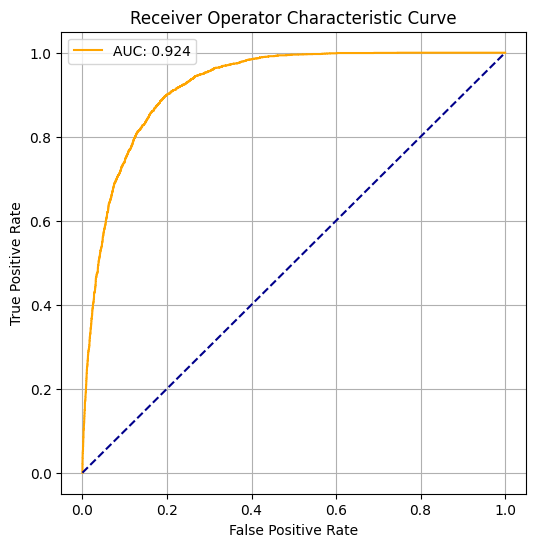

In [5]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()
text = f'AUC: {roc_auc:.3f}'
ax.plot(fpr, tpr, color='orange', label=text)
ax.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operator Characteristic Curve')
plt.legend()
plt.grid(True)
plt.show()
